In [40]:
#Migracion Neta = Número de inmigrantes - Número de emigrantes 
#2022 solo tiene un semestre en ambos casos
import pandas as pd

# Ruta de los archivos CSV
ruta_inmigracion = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/MovimientosMigratorios/Inmigracion.csv'
ruta_emigracion = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/MovimientosMigratorios/Emigracion.csv'

# Cargar los datasets
inmigracion_df = pd.read_csv(ruta_inmigracion, delimiter=';', decimal=',')
emigracion_df = pd.read_csv(ruta_emigracion, delimiter=';', decimal=',')

# Verificar las primeras filas de los datasets
print(inmigracion_df.head())
print(emigracion_df.head())

    Año    Total
0  2022  478.990
1  2021  528.856
2  2020  467.918
3  2019  750.480
4  2018  643.684
    Año    Total
0  2022  220.443
1  2021  380.786
2  2020  248.561
3  2019  296.248
4  2018  309.526


In [41]:
# Convertir las columnas 'Total' a formato numérico
inmigracion_df['Total'] = inmigracion_df['Total'].str.replace('.', '').str.replace(',', '.').astype(float)
emigracion_df['Total'] = emigracion_df['Total'].str.replace('.', '').str.replace(',', '.').astype(float)

# Verificar las conversiones
print(inmigracion_df.head())
print(emigracion_df.head())

# Renombrar las columnas para unificación
inmigracion_df = inmigracion_df.rename(columns={'Total': 'Inmigrantes'})
emigracion_df = emigracion_df.rename(columns={'Total': 'Emigrantes'})

# Unir los datasets en base al año
migracion_df = pd.merge(inmigracion_df, emigracion_df, on='Año')

# Calcular la migración neta
migracion_df['Migracion Neta'] = migracion_df['Inmigrantes'] - migracion_df['Emigrantes']

# Verificar el resultado
print(migracion_df)

    Año     Total
0  2022  478990.0
1  2021  528856.0
2  2020  467918.0
3  2019  750480.0
4  2018  643684.0
    Año     Total
0  2022  220443.0
1  2021  380786.0
2  2020  248561.0
3  2019  296248.0
4  2018  309526.0
    Año  Inmigrantes  Emigrantes  Migracion Neta
0  2022     478990.0    220443.0        258547.0
1  2021     528856.0    380786.0        148070.0
2  2020     467918.0    248561.0        219357.0
3  2019     750480.0    296248.0        454232.0
4  2018     643684.0    309526.0        334158.0
5  2017     532132.0    368860.0        163272.0
6  2016     414747.0    327324.0         87423.0
7  2015     342114.0    343874.0         -1760.0


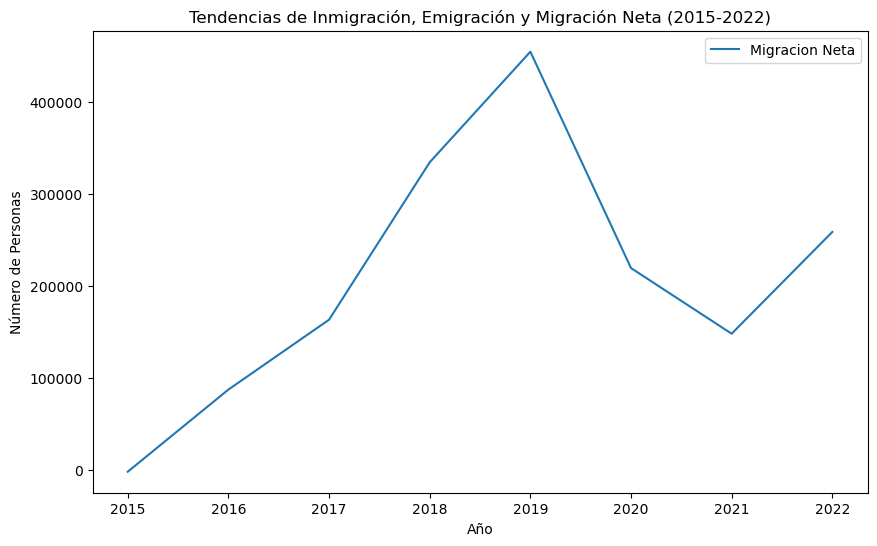

In [42]:
import matplotlib.pyplot as plt

# Tendencias de Inmigración y Emigración a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(migracion_df['Año'], migracion_df['Migracion Neta'], label='Migracion Neta')
plt.xlabel('Año')
plt.ylabel('Número de Personas')
plt.title('Tendencias de Inmigración, Emigración y Migración Neta (2015-2022)')
plt.legend()
plt.show()

In [57]:
# Cargar los datos desde el archivo Excel (.xlsx)
df2 = pd.read_excel("C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/PoblacionActiva/PoblacionActivaGeneral.xlsx", index_col=0)

# Convertir todos los valores del DataFrame en cadenas
df2 = df2.astype(str)

# Reemplazar las comas por puntos en todos los valores del DataFrame
df2 = df2.apply(lambda x: x.str.replace(',', '.'))

# Convertir los valores del DataFrame a números de punto flotante
df2 = df2.astype(float)

# Filtrar solo la primera fila
primera_fila = df2.iloc[[0]]

# Crear listas para almacenar los años y las medias por cuarteto
años = []
medias_por_cuarteto = []

# Iterar sobre cada conjunto de cuatro trimestres
for año in df2.columns.str[:4].unique():
    # Filtrar los datos correspondientes a ese año
    df_año = primera_fila.filter(like=año)
    # Iterar sobre cada conjunto de cuatro trimestres
    for i in range(0, len(df_año.columns), 4):
        # Obtener los cuatro trimestres actuales
        trimestres_actuales = df_año.iloc[:, i:i+4]
        # Calcular la media de los trimestres actuales
        media_trimestral = trimestres_actuales.mean(axis=1).iloc[0]
        # Agregar el año y la media al resultado
        años.append(año)
        medias_por_cuarteto.append(media_trimestral)

# Crear un DataFrame con los años y las medias por cuarteto
df_medias_por_cuarteto = pd.DataFrame({'Año': años, 'Población Activa Total': medias_por_cuarteto})

# Imprimir las medias por cuarteto
print("Población Activa Total:")
print(df_medias_por_cuarteto)

print(df_medias_por_cuarteto.columns)

Población Activa Total:
     Año  Población Activa Total
0   2023               23899.525
1   2022               23415.125
2   2021               23203.175
3   2020               22733.325
4   2019               23027.100
5   2018               22806.825
6   2017               22741.700
7   2016               22822.725
8   2015               22922.025
9   2014               22954.575
10  2013               23190.150
11  2012               23443.700
12  2011               23434.075
13  2010               23364.600
14  2009               23260.400
15  2008               23065.550
16  2007               22426.100
17  2006               21779.975
18  2005               21140.550
19  2004               20375.775
20  2003               19742.750
21  2002               18961.225
Index(['Año', 'Población Activa Total'], dtype='object')


In [58]:
import pandas as pd
import csv
import numpy as np

# Ruta de los archivos CSV
ruta_natalidad = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/TasaDeNatalidad/TasaDeNatalidad(1000 habitantes).csv'
ruta_esperanza_vida = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/EsperanzaDeVida/EsperanzaDeVidaGeneral.csv'

# Cargar los datasets
natalidad_df = pd.read_csv(ruta_natalidad, delimiter=';', decimal=',')
esperanza_vida_df = pd.read_csv(ruta_esperanza_vida, delimiter=';', decimal=',')

# Ruta del archivo Excel
archivo_excel = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/PoblacionPorEdad/PoblacionPorEdad.xlsx'

# Cargar el archivo Excel en un DataFrame de pandas
df = pd.read_excel(archivo_excel, engine='openpyxl')

# Seleccionar las filas correspondientes a cada grupo
menores_de_15 = df.iloc[2:5, 1:]
entre_15_y_49 = df.iloc[5:12, 1:]
entre_50_y_64 = df.iloc[12:15, 1:]
mayores_de_65 = df.iloc[15:23, 1:]

# Función para calcular la suma por año para cada grupo
def calcular_suma_por_grupo(grupo):
    return grupo.sum(axis=0)

# Calcular la suma por año para cada grupo
suma_por_año_menores_de_15 = calcular_suma_por_grupo(menores_de_15)
suma_por_año_entre_15_y_49 = calcular_suma_por_grupo(entre_15_y_49)
suma_por_año_entre_50_y_64 = calcular_suma_por_grupo(entre_50_y_64)
suma_por_año_mayores_de_65 = calcular_suma_por_grupo(mayores_de_65)

# Seleccionar la primera fila para obtener la población total de España para cada año
poblacion_total_espana = df.iloc[1, 1:]

# Cargar los datasets de tasa de natalidad y esperanza de vida
ruta_natalidad = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/TasaDeNatalidad/TasaDeNatalidad(1000 habitantes).csv'
ruta_esperanza_vida = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/EsperanzaDeVida/EsperanzaDeVidaGeneral.csv'
natalidad_df = pd.read_csv(ruta_natalidad, delimiter=';', decimal=',')
esperanza_vida_df = pd.read_csv(ruta_esperanza_vida, delimiter=';', decimal=',')

# Convertir a índices los periodos y años de los datasets
natalidad_df.set_index('Periodo', inplace=True)
esperanza_vida_df.set_index('Año', inplace=True)
print(df_medias_por_cuarteto)
df_medias_por_cuarteto.set_index('Año', inplace=True)
print(df_medias_por_cuarteto)
# Crear un diccionario para almacenar los resultados por año
resultados_por_año = {}


# Agregar los resultados al diccionario por año
for año in df.columns[1:]:
    resultados_por_año[año] = {
        "Población Total España": poblacion_total_espana[año],
        "Menores de 15": suma_por_año_menores_de_15[año],
        "Entre 15 y 49": suma_por_año_entre_15_y_49[año],
        "Entre 50 y 64": suma_por_año_entre_50_y_64[año],
        "Mayores de 65": suma_por_año_mayores_de_65[año],
        "Población Activa Total": df_medias_por_cuarteto.loc[año, 'Población Activa Total'] * 100 if año in df_medias_por_cuarteto.index else None,
        "Tasa Natalidad": natalidad_df.loc[int(año), 'Total'] if int(año) in natalidad_df.index else None,
        "Esperanza de Vida": esperanza_vida_df.loc[int(año), 'Total'] if int(año) in esperanza_vida_df.index else None,
        "Migración Neta": migracion_df.loc[migracion_df['Año'] == int(año), 'Migracion Neta'].values[0] if int(año) in migracion_df['Año'].values else None
    }

# Mostrar los resultados
for año, valores in resultados_por_año.items():
    print(año)
    print(valores)
    print()

# Crear un diccionario para almacenar los porcentajes por año de dicho rango de edad sobre la poblacion de ese año
porcentajes_por_año = {}

# Calcular los porcentajes para cada año
for año in df.columns[1:]:
    porcentajes_por_año[año] = {
        "Porcentaje Menores de 15": (suma_por_año_menores_de_15[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Entre 15 y 49": (suma_por_año_entre_15_y_49[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Entre 50 y 64": (suma_por_año_entre_50_y_64[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Mayores de 65": (suma_por_año_mayores_de_65[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Población Activa": (df_medias_por_cuarteto.loc[año, 'Población Activa Total'] * 100 / poblacion_total_espana[año]) * 1000 if año in df_medias_por_cuarteto.index else None,
        "Tasa Natalidad": resultados_por_año[año]["Tasa Natalidad"],
        "Esperanza de Vida": resultados_por_año[año]["Esperanza de Vida"],
        "Porcentaje Migración Neta": (migracion_df.loc[migracion_df['Año'] == int(año), 'Migracion Neta'].values[0] / poblacion_total_espana[año]) * 100 if int(año) in migracion_df['Año'].values else None
    }

# Mostrar los porcentajes
for año, valores in porcentajes_por_año.items():
    print(año)
    print(valores)
    print()


     Año  Población Activa Total
0   2023               23899.525
1   2022               23415.125
2   2021               23203.175
3   2020               22733.325
4   2019               23027.100
5   2018               22806.825
6   2017               22741.700
7   2016               22822.725
8   2015               22922.025
9   2014               22954.575
10  2013               23190.150
11  2012               23443.700
12  2011               23434.075
13  2010               23364.600
14  2009               23260.400
15  2008               23065.550
16  2007               22426.100
17  2006               21779.975
18  2005               21140.550
19  2004               20375.775
20  2003               19742.750
21  2002               18961.225
      Población Activa Total
Año                         
2023               23899.525
2022               23415.125
2021               23203.175
2020               22733.325
2019               23027.100
2018               22806.825
2017     

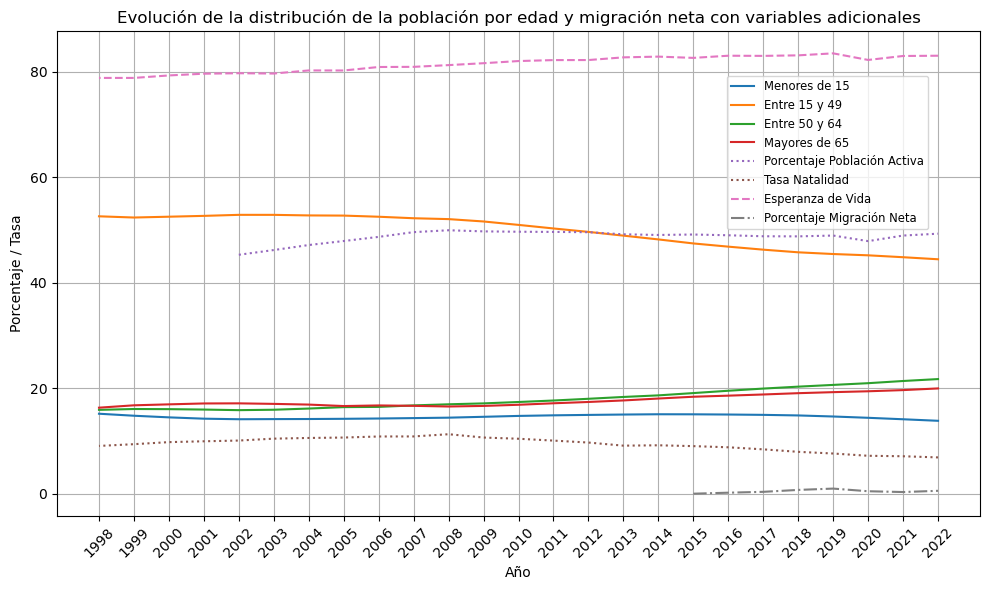

In [59]:
# Crear DataFrame para visualización
df_visualizacion = pd.DataFrame(porcentajes_por_año).T

# Obtener los años
años = df_visualizacion.index

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los porcentajes de cada grupo de edad
ax.plot(años[::-1], df_visualizacion["Porcentaje Menores de 15"][::-1], label="Menores de 15")
ax.plot(años[::-1], df_visualizacion["Porcentaje Entre 15 y 49"][::-1], label="Entre 15 y 49")
ax.plot(años[::-1], df_visualizacion["Porcentaje Entre 50 y 64"][::-1], label="Entre 50 y 64")
ax.plot(años[::-1], df_visualizacion["Porcentaje Mayores de 65"][::-1], label="Mayores de 65")

# Graficar la población activa
ax.plot(años[::-1], df_visualizacion["Porcentaje Población Activa"][::-1], label="Porcentaje Población Activa", linestyle='dotted')

# Graficar las tasas de natalidad y esperanza de vida
ax.plot(años, df_visualizacion["Tasa Natalidad"], label="Tasa Natalidad", linestyle='dotted')
ax.plot(años, df_visualizacion["Esperanza de Vida"], label="Esperanza de Vida", linestyle='dashed')

# Graficar la migración neta
ax.plot(años[::-1], df_visualizacion["Porcentaje Migración Neta"][::-1], label="Porcentaje Migración Neta", linestyle='dashdot')

# Configurar el gráfico
ax.set_title("Evolución de la distribución de la población por edad y migración neta con variables adicionales")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje / Tasa")
ax.legend(fontsize='small', bbox_to_anchor=(0.95, 0.75), loc='center right')  
ax.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()